In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("data/problem_2/problem_2_train.csv")

In [3]:
df.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [4]:
df.shape

(6250, 16)

In [5]:
df.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days'],
      dtype='object')

In [6]:
print(df.tat_in_days.unique())
print(len(df.tat_in_days.unique()))
print(df.tat_in_days.min())
print(df.tat_in_days.max())

[ 5 12  9  8 15 16 17 11 19 20 14 18 13 24 10 40  7 23 25 34 28  6  4 21
 22 29 27  3 26 37 32 30 44 33 57 38 43 45 31 35 41 36 46  2 39]
45
2
57


In [7]:
for i in df.columns:
    print(i,len(df[i].unique()))

srno 6147
mobmake 38
hubid 21
hubpincode 21
pickuppartnerid 4
deliverypartnerid 4
insuranceCompanyId 2
custpincodecategory 5
claimtype 2
custpincode 1923
memcreateddate 624
mobilepurchasedate 782
claimintdate 81
servicecntrid 137
pickupStartdate 83
tat_in_days 45


In [8]:
df.describe()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
count,6.250000e+03,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,2.946134e+06,11.732000,340546.139840,232.654400,231.495360,155.040480,366009.473440,4457.158080,12.730400
std,7.733480e+04,9.141463,213449.097822,30.471658,22.521945,41.883918,210990.167946,200.945634,5.075533
min,2.818359e+06,0.000000,0.000000,0.000000,0.000000,131.000000,0.000000,4008.000000,2.000000
25%,2.877226e+06,3.000000,110018.000000,233.000000,233.000000,131.000000,135034.000000,4398.000000,9.000000
50%,2.944426e+06,8.000000,400001.000000,233.000000,233.000000,131.000000,395001.500000,4474.000000,12.000000
75%,3.012237e+06,21.000000,500004.000000,233.000000,233.000000,131.000000,560016.000000,4580.000000,15.000000
max,3.101035e+06,27.000000,800001.000000,308.000000,245.000000,228.000000,855107.000000,5146.000000,57.000000


In [9]:
df.dtypes

srno                    int64
mobmake                object
hubid                   int64
hubpincode              int64
pickuppartnerid         int64
deliverypartnerid       int64
insuranceCompanyId      int64
custpincodecategory    object
claimtype              object
custpincode             int64
memcreateddate         object
mobilepurchasedate     object
claimintdate           object
servicecntrid           int64
pickupStartdate        object
tat_in_days             int64
dtype: object

In [10]:
df.isnull().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
tat_in_days            0
dtype: int64

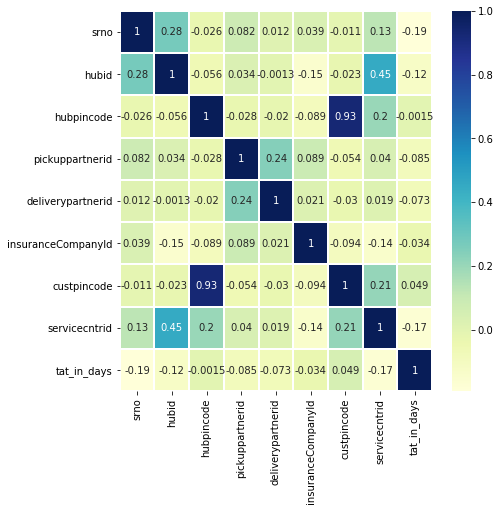

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
corr_mat=df.corr()
sns.heatmap(corr_mat, cbar = True,annot=True,linewidths=1, ax=ax ,cmap="YlGnBu")

# Basic Linear Regression

In [12]:
idf=df.select_dtypes(include=['integer'])
X=idf.drop(labels=['tat_in_days'],axis=1)
y=idf['tat_in_days']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

y_pred=model.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(y_pred)

0.08112613018502468
5.072155876773781
[14.32972294 11.47034069 14.05692374 ... 13.61397343 14.21724541
 12.7400551 ]


In [13]:
df.custpincodecategory.unique()

array(['A', 'B', 'C', '0', 'D'], dtype=object)

In [14]:
df.claimtype.unique()

array(['ADLD', 'EW'], dtype=object)

In [15]:
print(len(df.query("claimtype=='EW'")))
print(len(df.query("claimtype=='ADLD'")))

4
6246


In [16]:
print(len(list(df["memcreateddate"].unique())+list(df["mobilepurchasedate"].unique())+list(df["claimintdate"].unique())+list(df["pickupStartdate"].unique())))
print(len(set(list(df["memcreateddate"].unique())+list(df["mobilepurchasedate"].unique())+list(df["claimintdate"].unique())+list(df["pickupStartdate"].unique()))))

1570
816


In [17]:
dat=list(set(list(df["memcreateddate"].unique())+list(df["mobilepurchasedate"].unique())+list(df["claimintdate"].unique())+list(df["pickupStartdate"].unique())))

In [18]:
ff=pd.DataFrame(dat)
ff[0]=pd.to_datetime(ff[0])

In [19]:
ff.dtypes

0    datetime64[ns]
dtype: object

In [20]:
c=1
dat_dic={}
ddd=((ff.sort_values(by=0,axis=0))[0])
for i in ddd:
    dat_dic[(str(i)[:10])]=c
    c+=1

In [21]:
dat_dic

{'2015-02-26': 1,
 '2015-03-22': 2,
 '2015-04-07': 3,
 '2015-04-08': 4,
 '2015-05-01': 5,
 '2015-06-02': 6,
 '2015-06-08': 7,
 '2015-06-11': 8,
 '2015-06-25': 9,
 '2015-07-25': 10,
 '2015-09-03': 11,
 '2015-09-12': 12,
 '2015-09-21': 13,
 '2015-10-03': 14,
 '2015-10-07': 15,
 '2015-10-17': 16,
 '2015-10-26': 17,
 '2015-10-27': 18,
 '2015-10-29': 19,
 '2015-11-02': 20,
 '2015-11-05': 21,
 '2015-11-08': 22,
 '2015-11-15': 23,
 '2015-11-16': 24,
 '2015-11-21': 25,
 '2015-11-23': 26,
 '2015-12-01': 27,
 '2015-12-04': 28,
 '2015-12-07': 29,
 '2015-12-09': 30,
 '2015-12-11': 31,
 '2015-12-17': 32,
 '2015-12-20': 33,
 '2015-12-24': 34,
 '2015-12-28': 35,
 '2016-01-01': 36,
 '2016-01-06': 37,
 '2016-01-07': 38,
 '2016-01-10': 39,
 '2016-01-15': 40,
 '2016-01-16': 41,
 '2016-01-18': 42,
 '2016-01-19': 43,
 '2016-01-20': 44,
 '2016-01-22': 45,
 '2016-01-23': 46,
 '2016-01-29': 47,
 '2016-01-30': 48,
 '2016-01-31': 49,
 '2016-02-01': 50,
 '2016-02-05': 51,
 '2016-02-08': 52,
 '2016-02-12': 53,
 '

In [22]:
du1=pd.DataFrame(list(map(lambda x:dat_dic[x],df["claimintdate"])),columns=['claimintdate'])
du2=pd.DataFrame(list(map(lambda x:dat_dic[x],df["memcreateddate"])),columns=['memcreateddate'])
du3=pd.DataFrame(list(map(lambda x:dat_dic[x],df["mobilepurchasedate"])),columns=['mobilepurchasedate'])
du4=pd.DataFrame(list(map(lambda x:dat_dic[x],df["pickupStartdate"])),columns=['pickupStartdate'])
du5=pd.DataFrame(list(map(lambda x:(dat_dic[x[0]]-dat_dic[x[1]]),df[["pickupStartdate","claimintdate"]].values)),columns=['diff'])

In [23]:
dcat=dict(zip(list(df['custpincodecategory'].unique()),list(np.arange(len(df['custpincodecategory'].unique())))))
cpcc=[]
for i in range(df.shape[0]):
    cpcc.append(dcat[df.loc[i].custpincodecategory])
# df["custpincodecategory"]=cpcc

In [24]:
dmm=dict(zip(list(df['mobmake'].unique()),list(np.arange(len(df['mobmake'].unique())))))
mm=[]
for i in range(df.shape[0]):
    mm.append(dmm[df.loc[i].mobmake])
# df["mobmake"]=mm

# Linear Regression

In [25]:
idf=df.select_dtypes(include=['integer'])
idf = pd.concat([idf,du1,du2,du3,du4,du5],axis=1)
# idf.drop(labels=['custpincodecategory'],inplace=True,axis=1)
idf["custpincodecategory"]=cpcc
idf["mobmake"]=mm
X=idf.drop(labels=['tat_in_days','srno'],axis=1)
y=idf['tat_in_days']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
model=LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

y_pred=model.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(y_pred)

0.1953115053388046
4.746555211368139
[12.35575652 11.45556637 16.80514684 ... 12.99765088 12.09947544
 11.87101359]


In [26]:
idf.columns

Index(['srno', 'hubid', 'hubpincode', 'pickuppartnerid', 'deliverypartnerid',
       'insuranceCompanyId', 'custpincode', 'servicecntrid', 'tat_in_days',
       'claimintdate', 'memcreateddate', 'mobilepurchasedate',
       'pickupStartdate', 'diff', 'custpincodecategory', 'mobmake'],
      dtype='object')

# Polynomial Regression

In [27]:
idf=df.select_dtypes(include=['integer'])
idf = pd.concat([idf,du1,du2,du3,du4,du5],axis=1)
# idf.drop(labels=['custpincodecategory'],inplace=True,axis=1)
idf["custpincodecategory"]=cpcc
# idf["mobmake"]=mm
X=idf.drop(labels=['tat_in_days','srno'],axis=1)
y=idf['tat_in_days']

from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures() 
X_poly = poly.fit_transform(X_train)
X1_poly=poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train)
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
y_pred=lin2.predict(X1_poly)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(y_pred)

4.688381398558193
[13.53017879 10.45236914  9.6689368  ... 13.28503424 13.1352638
 12.75462046]


In [28]:
print(y_pred)

[13.53017879 10.45236914  9.6689368  ... 13.28503424 13.1352638
 12.75462046]


In [29]:
idf.columns

Index(['srno', 'hubid', 'hubpincode', 'pickuppartnerid', 'deliverypartnerid',
       'insuranceCompanyId', 'custpincode', 'servicecntrid', 'tat_in_days',
       'claimintdate', 'memcreateddate', 'mobilepurchasedate',
       'pickupStartdate', 'diff', 'custpincodecategory'],
      dtype='object')

In [30]:
idf.head()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,claimintdate,memcreateddate,mobilepurchasedate,pickupStartdate,diff,custpincodecategory
0,2851218,7,500004,233,233,131,500001,4403,5,739,452,306,744,5,0
1,2838330,10,226010,233,233,131,226022,4444,12,735,400,399,739,4,0
2,2835781,2,110018,233,233,228,110018,4388,9,734,732,727,743,9,0
3,2838589,2,110018,233,233,228,124001,4092,9,735,717,731,745,10,1
4,2855214,21,110015,233,233,131,201301,4580,8,740,723,720,745,5,0


In [31]:
idf=df.select_dtypes(include=['integer'])
idf = pd.concat([idf,du1,du2,du3,du4,du5],axis=1)
idf["custpincodecategory"]=cpcc
X=idf.drop(labels=['tat_in_days','srno'],axis=1)
y=idf['tat_in_days']

from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

# Lasso regression

In [32]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

5.295169319142424


# Elastic Net Regression

In [33]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)
y_pred = ENreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


4.884192406933755


# Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor  
  
regressor = DecisionTreeRegressor(random_state = 1)  
  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

6.041231755696819


# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4.888183906964292


# Finally!!! Polynomial Regression is Best

In [36]:
df=pd.read_csv("data/problem_2/problem_2_train.csv")

In [37]:
dat=list(set(list(df["memcreateddate"].unique())+list(df["mobilepurchasedate"].unique())+list(df["claimintdate"].unique())+list(df["pickupStartdate"].unique())))
ff=pd.DataFrame(dat)
ff[0]=pd.to_datetime(ff[0])
c=1
dat_dic={}
ddd=((ff.sort_values(by=0,axis=0))[0])
for i in ddd:
    dat_dic[(str(i)[:10])]=c
    c+=1

In [38]:
du1=pd.DataFrame(list(map(lambda x:dat_dic[x],df["claimintdate"])),columns=['claimintdate'])
du2=pd.DataFrame(list(map(lambda x:dat_dic[x],df["memcreateddate"])),columns=['memcreateddate'])
du3=pd.DataFrame(list(map(lambda x:dat_dic[x],df["mobilepurchasedate"])),columns=['mobilepurchasedate'])
du4=pd.DataFrame(list(map(lambda x:dat_dic[x],df["pickupStartdate"])),columns=['pickupStartdate'])
du5=pd.DataFrame(list(map(lambda x:(dat_dic[x[0]]-dat_dic[x[1]]),df[["pickupStartdate","claimintdate"]].values)),columns=['diff'])

In [39]:
dcat=dict(zip(list(df['custpincodecategory'].unique()),list(np.arange(len(df['custpincodecategory'].unique())))))
cpcc=[]
for i in range(df.shape[0]):
    cpcc.append(dcat[df.loc[i].custpincodecategory])

# Training using Polynomial Regression

In [40]:
idf=df.select_dtypes(include=['integer'])
idf = pd.concat([idf,du1,du2,du3,du4,du5],axis=1)
idf["custpincodecategory"]=cpcc
X=idf.drop(labels=['tat_in_days','srno'],axis=1)
y=idf['tat_in_days']

from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures() 
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
df=pd.read_csv("data/problem_2/problem_2_test.csv")

In [42]:
dat=list(set(list(df["memcreateddate"].unique())+list(df["mobilepurchasedate"].unique())+list(df["claimintdate"].unique())+list(df["pickupStartdate"].unique())))
ff=pd.DataFrame(dat)
ff[0]=pd.to_datetime(ff[0])
c=1
dat_dic={}
ddd=((ff.sort_values(by=0,axis=0))[0])
for i in ddd:
    dat_dic[(str(i)[:10])]=c
    c+=1

In [43]:
du1=pd.DataFrame(list(map(lambda x:dat_dic[x],df["claimintdate"])),columns=['claimintdate'])
du2=pd.DataFrame(list(map(lambda x:dat_dic[x],df["memcreateddate"])),columns=['memcreateddate'])
du3=pd.DataFrame(list(map(lambda x:dat_dic[x],df["mobilepurchasedate"])),columns=['mobilepurchasedate'])
du4=pd.DataFrame(list(map(lambda x:dat_dic[x],df["pickupStartdate"])),columns=['pickupStartdate'])
du5=pd.DataFrame(list(map(lambda x:(dat_dic[x[0]]-dat_dic[x[1]]),df[["pickupStartdate","claimintdate"]].values)),columns=['diff'])

In [44]:
dcat=dict(zip(list(df['custpincodecategory'].unique()),list(np.arange(len(df['custpincodecategory'].unique())))))
cpcc=[]
for i in range(df.shape[0]):
    cpcc.append(dcat[df.loc[i].custpincodecategory])

# Predicting using Polynomial Regression Model

In [45]:
idf=df.select_dtypes(include=['integer'])
idf = pd.concat([idf,du1,du2,du3,du4,du5],axis=1)
idf["custpincodecategory"]=cpcc
X=idf.drop(labels=['srno'],axis=1)

from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures()
X_poly=poly.fit_transform(X)
  
y_pred=lin2.predict(X_poly)

# Saving to File

In [46]:
save_df=pd.DataFrame(y_pred)
save_df.to_csv("final_problem_2.csv",sep=',')